<a href="https://colab.research.google.com/github/franz6ko/vision-artificial-2/blob/master/Clase-2/Con_pool_vs_sin_pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimento para ver el efecto de una capa POOL 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Dataset: Fashion Mnist

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset que consiste de 60,000 imágenes de entrenamiento en blanco y negro catalogadas en 10 categorías y un test set de 10,000 imágenes. Los labels/rótulos son:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover 
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

### Para importar
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Retorna:
2 tuplas:
1. x_train, x_test: array de uint8 de imágenes blanco y negro de dimensiones (num_samples, 28, 28)
2. y_train, y_test: array de uint8 d rótulos (enteros en el rango range 0-9) con dimensiones (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Redimensionamos los datos

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### Normalización

In [6]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Dividimos los datos en datasets de entrenamiento/validación/test

In [7]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Arquitectura con Pooling vs sin Pooling

![image.png](attachment:image.png)

### Pooling vs No Pooling

In [51]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(128, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

# el segundo modelo no tiene Max Pool, notar que strides = 2 en la capa convolucional para que los dos modelos tengan
# la misma cantidad de parámetros
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=2, padding='valid', activation='relu'))
model_b.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=2, padding='valid', activation='relu'))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(128, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


In [52]:
model_a.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)             

In [53]:
model_b.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
flatten_20 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1290      
Total params: 503,690
Trainable params: 503,690
Non-trainable params: 0
_______________________________________________

In [55]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [56]:
model_history_a = model_a.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 192s 223ms/step - loss: 1.1074 - accuracy: 0.6063 - val_loss: 0.7069 - val_accuracy: 0.7508
Epoch 2/3
860/860 [==============================] - 193s 224ms/step - loss: 0.5644 - accuracy: 0.7882 - val_loss: 0.5162 - val_accuracy: 0.8204
Epoch 3/3
860/860 [==============================] - 193s 225ms/step - loss: 0.4770 - accuracy: 0.8252 - val_loss: 0.4429 - val_accuracy: 0.8378


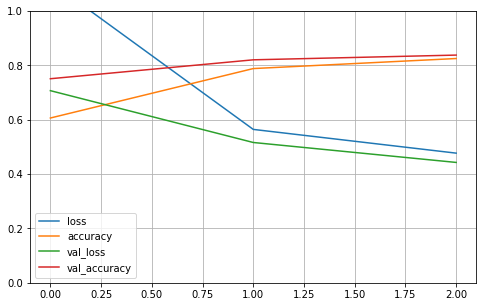

In [57]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
ev = model_a.evaluate(X_test_n, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.4754 - accuracy: 0.8259


In [59]:
X_new = X_test[:3]

In [60]:
y_pred = model_a.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [61]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


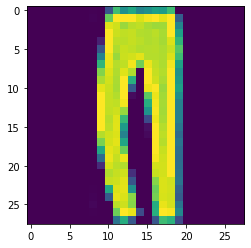

In [62]:
print(plt.imshow(X_test[2].reshape((28,28))))

In [63]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 59s 68ms/step - loss: 1.0679 - accuracy: 0.6310 - val_loss: 0.6439 - val_accuracy: 0.7602
Epoch 2/3
860/860 [==============================] - 59s 69ms/step - loss: 0.6036 - accuracy: 0.7776 - val_loss: 0.5398 - val_accuracy: 0.8050
Epoch 3/3
860/860 [==============================] - 59s 69ms/step - loss: 0.5266 - accuracy: 0.8062 - val_loss: 0.5785 - val_accuracy: 0.7534


In [64]:
ev = model_b.evaluate(X_test_n, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.6294 - accuracy: 0.7375
